# Machine Learning Project

# I. Introduction

Sequence classification is a type of predictive problem where we try to predict the category of a sequence of inputs over space or time. It is a hard task because the inputs can vary in length, the set of words (vocabulary) can be vary large and the model may want to understand the long-term context of a sequence.

## Description of the dataset

We will demonstrate sequence learning through a twitter sentiment analysis classification problem. Each tweet are short messages of varied length of words and the task is to build a classifier that can correctly predict the sentiment of each tweet.
Our dataset contains more than 1.2 million tweets, equally split in positive and negative messages. 

## Approach

We will approach this classification task by first getting an overlook of the dataset and the kind of messages we have at hand. Then we will apply some NLP techniques to transform our data into numerical objects (embedding) which we will feed into various Machine Learning Models. From Logistic Regressions to Deep Learning models, we will compare them and create a benchmark of various Supervised models for this classification task.

## Import

### Libraries and modules

In [2]:
import numpy as np
import pandas as pd
from Functions import GridSearch_, make_results

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.3)
sns.set(style="darkgrid")

# Machine Learning
## Tools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
## Models
import xgboost as xgb

### Dataset

In [3]:
emote = pd.read_csv("data/MLUnige2021_train.csv",usecols=['emotion', 'user', 'text'])
emote_50 = emote[:50000]   #  50.000 first obs
emote_100 = emote[:100000] # 100.000 first obs
emote_320 = emote[:320000] #  about 1/4 of obs

results = pd.DataFrame()

## XGBoost

XGBoost, which stands for eXtreme Gradient Boosting, is a popular and powerful machine learning algorithm used for regression and classification tasks. It belongs to the family of gradient boosting algorithms, which are ensemble learning methods. Ensemble learning involves combining the predictions of multiple machine learning models to improve overall performance.

Here are the parameters we can tune: https://xgboost.readthedocs.io/en/stable/parameter.html

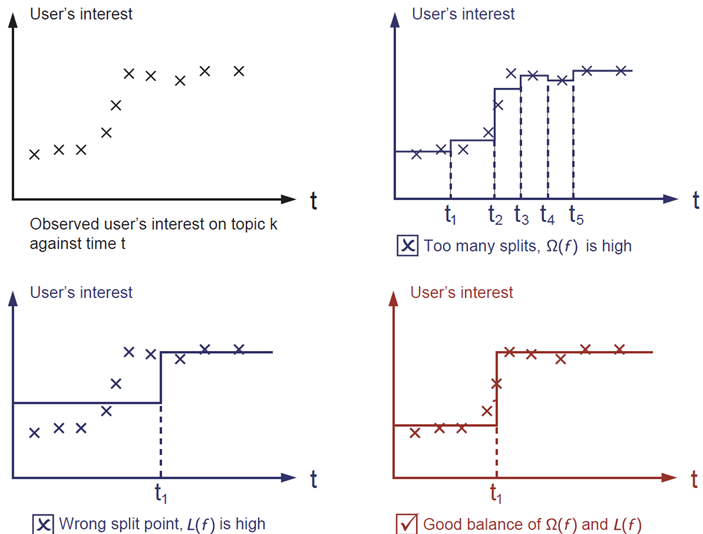

Performing grid search...

Data length:  40000
Pipeline: CountVectorizer() TfidfTransformer() XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Parameters:
{'model__learning_rate': [0.1, 0.2, 0.4, 0.5, 0.8],
 'model__max_depth': [3, 5, 10],
 'model__min_child_weight': [0.5, 1, 2, 5],
 'mod

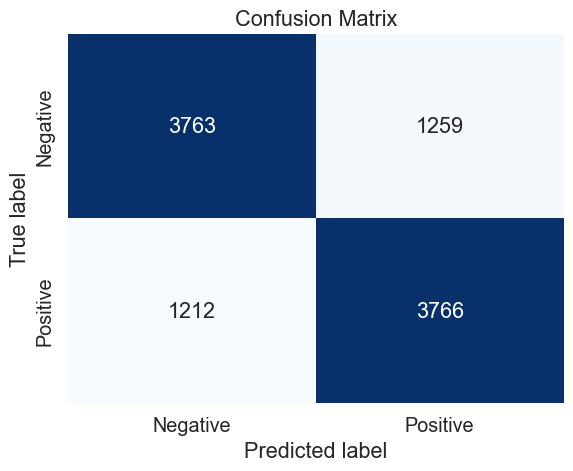

In [80]:
# Define the train and test sets (50 000 observations)
data = emote_50
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune 
# Common values: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
parameters_xgb = {'model__max_depth' : [3,5,10], # maximum depth of a tree, same as GBM.
                  'model__learning_rate': [.1,.2,.4,.5,.8], # the step size shrinkage used in update to prevent overfitting.
                  'model__n_estimators': [10,30,50,100],
                  'model__min_child_weight': [.5,1,2,5] # defines the minimum sum of weights of all observations required in a child
}

# Perform the grid search
gs = GridSearch_(X_train, y_train, parameters = parameters_xgb, model = xgb.XGBClassifier(objective='binary:logistic', eval_metric = 'auc'))

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

xgb_50_cv_results = make_results('xgb', '50', gs, 'accuracy')
results = pd.concat([results, xgb_50_cv_results], axis=0)

Performing grid search...

Data length:  80000
Pipeline: CountVectorizer() TfidfTransformer() XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Parameters:
{'model__learning_rate': [0.2, 0.3, 0.4],
 'model__max_depth': [15, 20],
 'model__min_child_weight': [2, 3],
 'model__n_estimators': [

C:\Users\rened\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rened\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rened\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rened\Anaconda3\lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\Users\rened\Anaconda3\lib\site-p

Duration: 33816.8s (n_jobs: 3)

Best score: 0.766
Best parameters set:
	model__learning_rate: 0.3
	model__max_depth: 15
	model__min_child_weight: 2
	model__n_estimators: 200


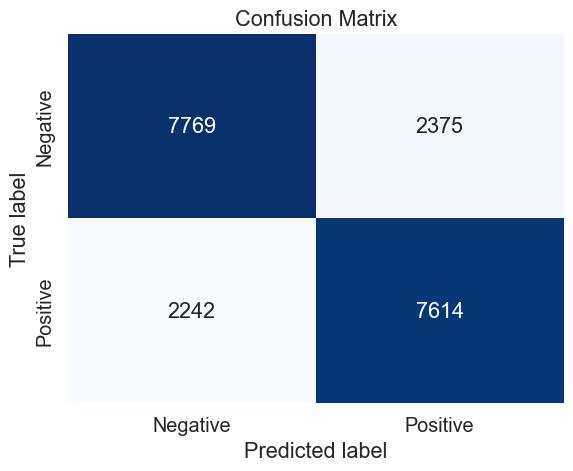

In [81]:
# Define the train and test sets (100 000 observations)
data = emote_100
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune 
# Common values: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
parameters_xgb = {'model__max_depth' : [15,20,], # maximum depth of a tree, same as GBM.
                  'model__learning_rate': [.2,.3,.4,], # the step size shrinkage used in update to prevent overfitting.
                  'model__n_estimators': [150,200,], # number of trees
                  'model__min_child_weight': [2,3,] # defines the minimum sum of weights of all observations required in a child
}

# Perform the grid search
gs = GridSearch_(X_train, 
                 y_train, 
                 n_jobs=3, ############################################################################################## 
                 parameters = parameters_xgb, 
                 model = xgb.XGBClassifier(objective='binary:logistic', eval_metric = 'auc'))

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

xgb_100_cv_results = make_results('xgb', '100', gs, 'accuracy')
results = pd.concat([results, xgb_100_cv_results], axis=0)

In [84]:
# Define the train and test sets (320 000 observations)
data = emote_320
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune 
# Common values: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
parameters_xgb = {'model__max_depth' : [15,], # maximum depth of a tree, same as GBM.
                  'model__learning_rate': [.3,], # the step size shrinkage used in update to prevent overfitting.
                  'model__n_estimators': [200,], # number of trees
                  'model__min_child_weight': [2,] # defines the minimum sum of weights of all observations required in a child
}

# Perform the grid search
gs = GridSearch_(X_train, 
                 y_train, 
                 n_jobs=3, ############################################################################################## 
                 parameters = parameters_xgb, 
                 model = xgb.XGBClassifier(objective='binary:logistic', eval_metric = 'auc'))

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

xgb_320_cv_results = make_results('xgb', '320', gs, 'accuracy')
results = pd.concat([results, xgb_320_cv_results], axis=0)

Performing grid search...

Data length:  256000
Pipeline: CountVectorizer() TfidfTransformer() XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Parameters:
{'model__learning_rate': [0.3],
 'model__max_depth': [15],
 'model__min_child_weight': [2],
 'model__n_estimators': [200]}

Fitting 5

C:\Users\rened\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rened\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rened\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rened\Anaconda3\lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\Users\rened\Anaconda3\lib\site-pack

XGBoostError: [14:32:55] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\common\io.h:232: bad_malloc: Failed to allocate 9110324880 bytes.

In [ ]:
######################################### Final hypertuned model #########################################

# Define the train and test sets (all observations)
data = emote
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=42)

# Define the parameters to tune
parameters_xgb = {'model__max_depth' : [15,], # maximum depth of a tree, same as GBM.
                  'model__learning_rate': [.2,], # the step size shrinkage used in update to prevent overfitting.
                  'model__n_estimators': [200,], # number of trees
                  'model__min_child_weight': [3,] # defines the minimum sum of weights of all observations required in a child
}

# Perform the grid search
gs = GridSearch_(X_train, y_train, parameters = best_parameters_xgb, model = xgb.XGBClassifier(objective='binary:logistic', eval_metric = 'auc'))

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

xgb_cv_results = make_results('xgb', 'all', gs, 'accuracy')
results = pd.concat([results, xgb_cv_results], axis=0)

In [ ]:
results.to_csv('Models Results/xgb_res.csv')

# IV. Results

Here is a benchmark of all the models accuracy performance:

In [7]:
data = {'model': ['log', 'log', 'log', 'log', 'mnb', 'mnb', 'mnb', 'mnb', 'svm', 'svm', 'svm', 'svm'], 
        'size': ['50', '100', '320', 'all', '50', '100', '320', 'all', '50', '100', '320', 'all'], 
        'accuracy':[0.770, 0.785, 0.803, 0.821, 0.763, 0.778, 0.792, 0.810, 0.780, 0.794, 0.811, 0.828]}
results_ = pd.DataFrame.from_dict(data)

<Figure size 500x500 with 0 Axes>

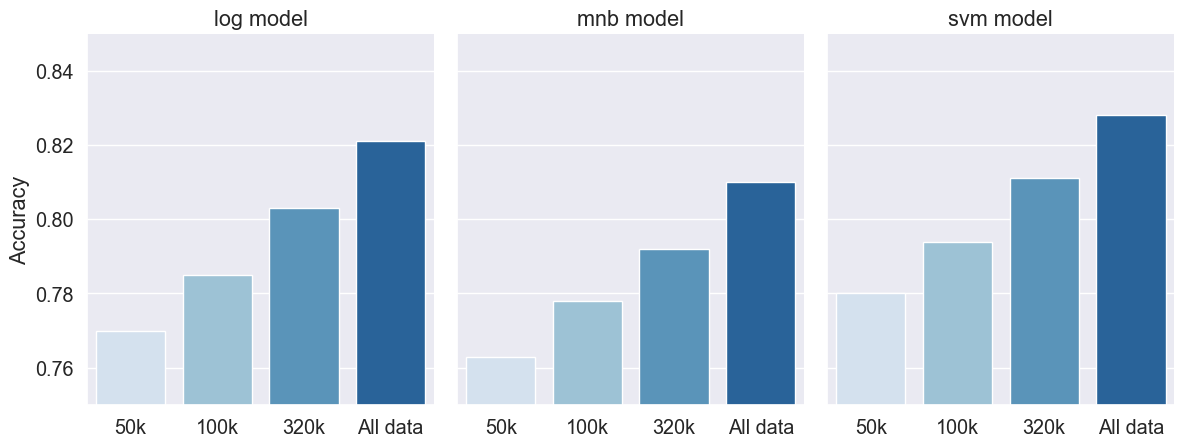

In [45]:
plt.figure(figsize=(5, 5))
g = sns.catplot(x='size',
                y='accuracy',
                col='model',
                data=results_,
                kind='bar',
                palette="Blues",
                height=5,
                aspect=.8)
g.set_axis_labels("", "Accuracy")
g.set_xticklabels(["50k", "100k", "320k", 'All data'])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0.75, 0.85));